In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
iris =   pd.read_csv("Iris.csv")
print("Head ==> \n",iris.head()) 
print("Describe ==> \n",iris.describe()) 

Head ==> 
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Describe ==> 
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.3

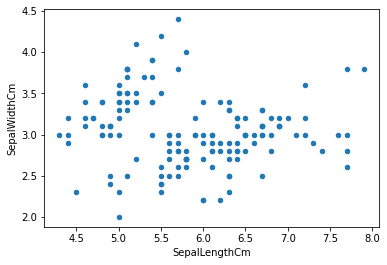

In [5]:
from matplotlib import pyplot as plt
iris.plot(kind="scatter", x="SepalLengthCm",   y="SepalWidthCm")
plt.show()

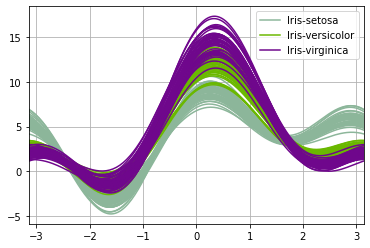

In [6]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x = iris.iloc[:, :-1].values 
y = iris.iloc[:,   -1].values 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.tree import   DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
classifier   = DecisionTreeClassifier()
classifier.fit(x_train,   y_train) 
y_pred   = classifier.predict(x_test) 
print(classification_report(y_test,   y_pred)) 
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


Text(0.5, 15.0, 'Predicted label')

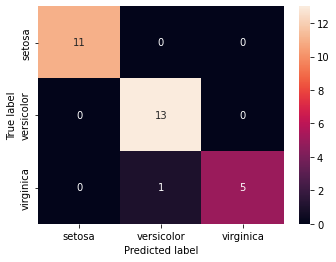

In [9]:
import seaborn as sns
cm  = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df,   annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

[[ 25.5     5.006   3.418   1.464   0.244]
 [125.5     6.588   2.974   5.552   2.026]
 [ 75.5     5.936   2.77    4.26    1.326]]


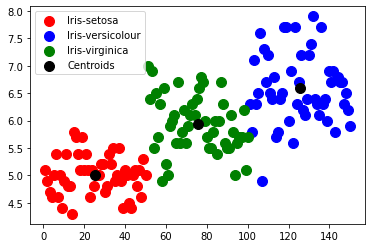

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris_data=load_iris()  
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) 
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) 
y_kmeans = kmeans.fit_predict(x)
print(kmeans.cluster_centers_) #display cluster centers
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')  
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids') 
plt.legend()
plt.show()